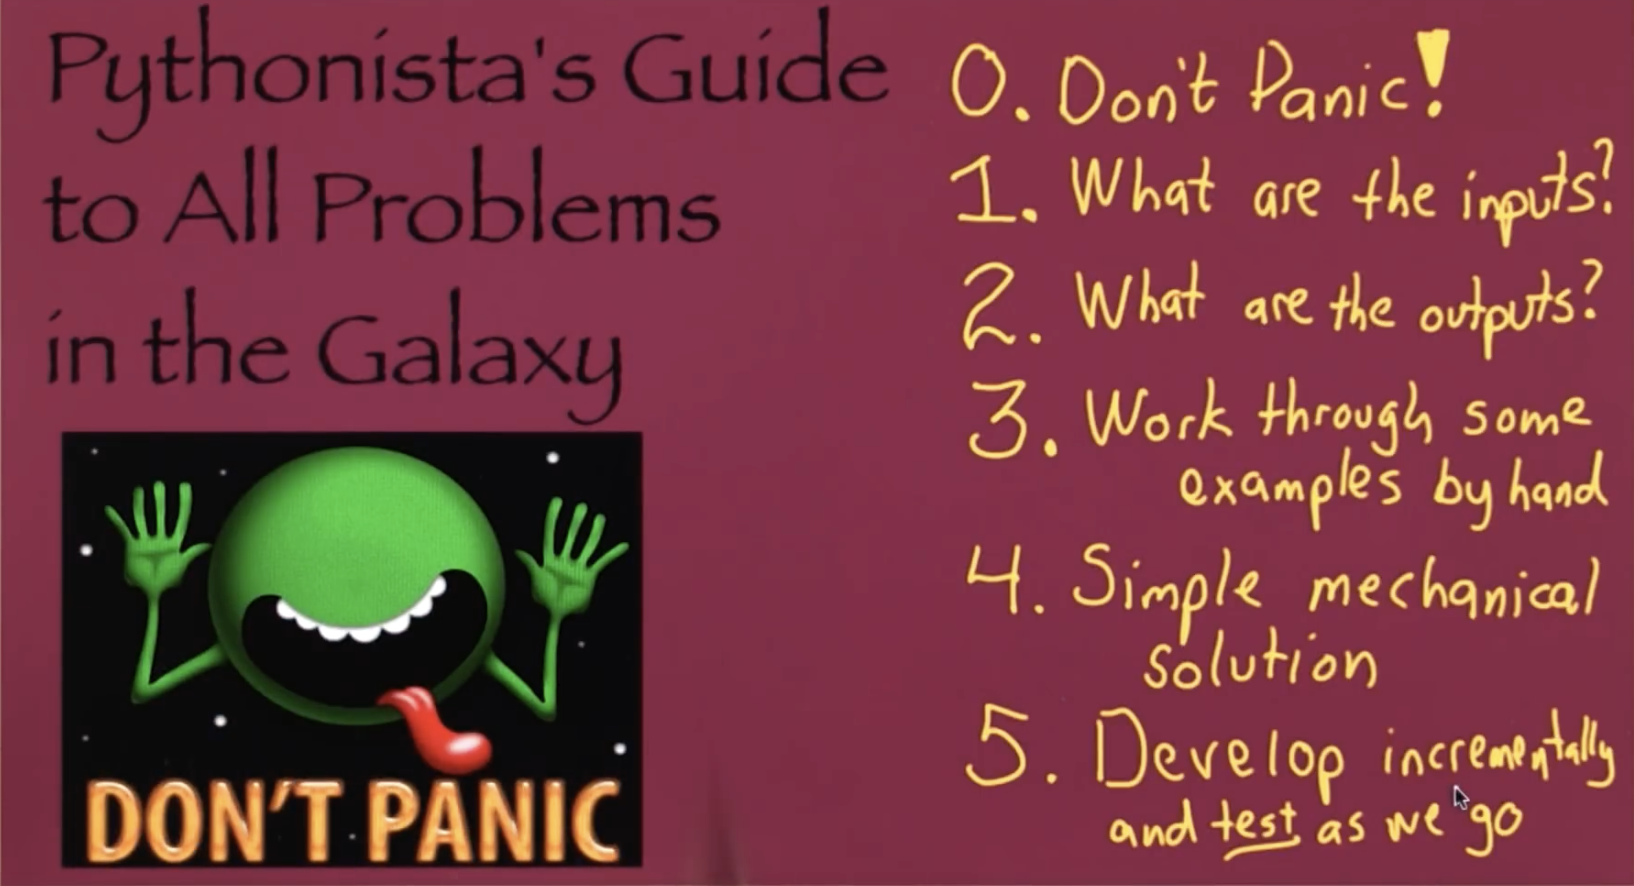

**Days Between Dates**

This lesson will focus on one problem: calculating the number of days between two dates.

This workspace is yours to use in whatever way is helpful. You might want to keep it open in a second tab as you go through the videos.

In [ ]:
def daysBetweenDates(year1, month1, day1, year2, month2, day2):
    """
    Calculates the number of days between two dates.
    """
    
    # TODO - by the end of this lesson you will have
    #  completed this function. You do not need to complete
    #  it yet though! 
    
    return 0

def testDaysBetweenDates():
    
    # test same day
    assert(daysBetweenDates(2017, 12, 30,
                              2017, 12, 30) == 0)
    # test adjacent days
    assert(daysBetweenDates(2017, 12, 30, 
                              2017, 12, 31) == 1)
    # test new year
    assert(daysBetweenDates(2017, 12, 30, 
                              2018, 1,  1)  == 2)
    # test full year difference
    assert(daysBetweenDates(2012, 6, 29,
                              2013, 6, 29)  == 365)
    
    print("Congratulations! Your daysBetweenDates")
    print("function is working correctly!")
    
testDaysBetweenDates()

In [1]:
###
### Define a simple nextDay procedure, that assumes
### every month has 30 days.
###
### For example:
###    nextDay(1999, 12, 30) => (2000, 1, 1)
###    nextDay(2013, 1, 30) => (2013, 2, 1)
###    nextDay(2012, 12, 30) => (2013, 1, 1)  (even though December really has 31 days)
###

def nextDay(year, month, day):
    """
    Returns the year, month, day of the next day.
    Simple version: assume every month has 30 days.
    """
    day += 1
    if day > 30:
        day = 1
        month += 1
        
    if month > 12:
        month = 1
        year += 1
        
    return year, month, day

In [6]:
# Define a daysBetweenDates procedure that would produce the
# correct output if there was a correct nextDay procedure.
#
# Note that this will NOT produce correct outputs yet, since
# our nextDay procedure assumes all months have 30 days
# (hence a year is 360 days, instead of 365).
# 

def nextDay(year, month, day):
    """Simple version: assume every month has 30 days"""
    if day < 30:
        return year, month, day + 1
    else:
        if month == 12:
            return year + 1, 1, 1
        else:
            return year, month + 1, 1
        
def daysBetweenDates(year1, month1, day1, year2, month2, day2):
    """Returns the number of days between year1/month1/day1
       and year2/month2/day2. Assumes inputs are valid dates
       in Gregorian calendar, and the first date is not after
       the second."""
        
    # YOUR CODE HERE!
    days = 0
    while year1 != year2 or month1 != month2 or day1 != day2:
        year1, month1, day1 = nextDay(year1, month1, day1)
        days += 1
    return days


def test():
    test_cases = [((2012,9,30,2012,10,30),30), 
                  ((2012,1,1,2013,1,1),360),
                  ((2012,9,1,2012,9,4),3)]
    
    for (args, answer) in test_cases:
        result = daysBetweenDates(*args)
        if result != answer:
            print("Test with data:", args, "failed")
        else:
            print("Test case passed!")

test()
    


Test case passed!
Test case passed!
Test case passed!


You're writing small bits of code that you can test independently as you go. You don't want to a lot of code and not being able to test it.

As a developer is to think of ways to structure a code, to organize the way you build code, so you're able to do meaningful tests as you go.

1. Every year divisible by 4 is a leap year. (For example, 1996 was a leap year.)

2. Except that years divisible by 100 years are not leap years. (For example, 1900 was not a leap year.)

3. Except that years divisible by 400 years are leap years. (So 2000 will be a leap year after all.)

In [45]:
def isLeapYear(year):   # my version
    if year % 400 == 0:
        return True
    if year % 4 == 0:
        if year % 100 == 0:
            return False
        else:
            return True

In [46]:
def isLeapYear(year):
    if year % 400 == 0:
        return True
    elif year % 100 == 0:
        return False
    elif year % 4 == 0:
        return True
    else:
        return False

In [44]:
print(isLeapYear(1996))
print(isLeapYear(2000))
print(isLeapYear(1900))

True
True
False


In [1]:
def isLeapYear(year):
    if year % 400 == 0:
        return True
    if year % 4 == 0:
        if year % 100 == 0:
            return False
        else:
            return True
        
def daysInMonth(year, month):
    if month == 2:
        if isLeapYear(year):
            return 29
        else:
            return 28
    
    if month < 8:
        if month % 2 != 0:
            return 31
        else:
            return 30
    else:
        if month % 2 == 0:
            return 31
        else:
            return 30
    

def nextDay(year, month, day):
    if day < daysInMonth(year, month):
        return year, month, day + 1
    else:
        if month == 12:
            return year + 1, 1, 1
        else:
            return year, month + 1, 1

def dateIsBefore(year1, month1, day1, year2, month2, day2):
    if year1 < year2:
        return True
    if year1 == year2:
        if month1 < month2:
            return True
        if month1 == month2:
            return day1 < day2
    return False


def daysBetweenDates(year1, month1, day1, year2, month2, day2):
    """Returns the number of days between year1/month1/day1
       and year2/month2/day2. Assumes inputs are valid dates
       in Gregorian calendar, and the first date is not after
       the second."""

    assert not dateIsBefore(year2, month2, day2, year1, month1, day1)
    
    days = 0
    while dateIsBefore(year1, month1, day1, year2, month2, day2):
        year1, month1, day1 = nextDay(year1, month1, day1)
        days += 1
    return days


In [41]:
daysBetweenDates(2013, 1, 24, 2013, 6, 29)
daysBetweenDates(1912, 12, 12, 2012, 12, 12)
daysBetweenDates(2017, 12, 30, 2018, 1, 1)

2

In [50]:
def test():
    assert daysBetweenDates(2013, 1, 1, 2013, 1, 1) == 0
    assert daysBetweenDates(2013, 1, 1, 2013, 1, 2) == 1
    assert nextDay(2013, 1, 1) == (2013, 1, 2)
    assert nextDay(2013, 4, 30) == (2013, 5, 1)
    assert nextDay(2012, 12, 31) == (2013, 1, 1)
    assert nextDay(2013, 2, 28) == (2013, 3, 1)
    assert nextDay(2013, 9, 30) == (2013, 10, 1)
    assert nextDay(2012, 2, 28) == (2012, 2, 29)
    assert daysBetweenDates(2012, 1, 1, 2013, 1, 1) == 366
    assert daysBetweenDates(2013, 1, 1, 2014, 1, 1) == 365
    print("Tests finished")
    
test()

Tests finish


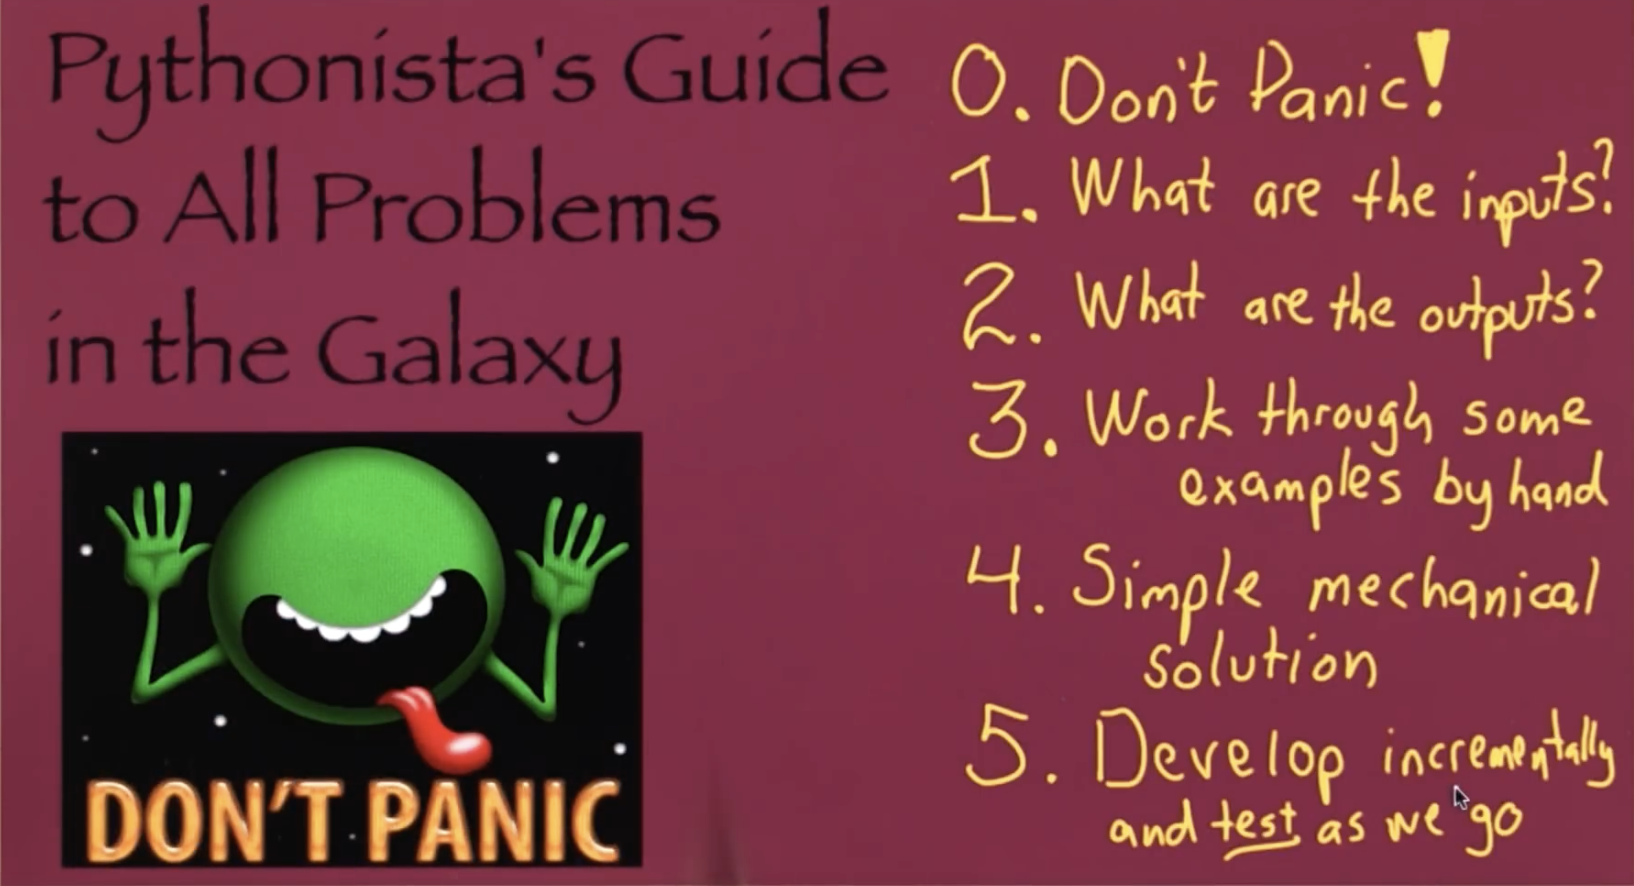